In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # 그래프
from sklearn.metrics import accuracy_score, precision_score

# 1. 데이터 불러오기 및 확인

## 1-1 파일 불러오기

In [81]:
df = pd.read_csv("Preprocessed_ObesityDataSet1.csv")
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad,BMI
0,0,21,1.62,64.0,0,0,2,3,2,0,...,0,1,3,0,0,0,1,0,1,24.386526
1,0,21,1.52,56.0,0,0,3,3,2,1,...,3,0,2,0,0,0,1,0,1,24.238227
2,1,23,1.80,77.0,0,0,2,3,2,0,...,2,1,1,0,0,0,1,0,1,23.765432


In [82]:
df.duplicated().sum()

47

## 1-2 데이터 확인하기

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [84]:
df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.315964,1.701669,86.585978,0.182378,0.883941,2.423496,2.687826,1.859308,0.020843,...,1.006632,0.664614,2.268593,0.216485,0.003316,0.005211,0.748460,0.026528,3.112269,29.700395
std,0.500083,6.357078,0.093311,26.191165,0.386247,0.320371,0.583905,0.809680,0.468543,0.142893,...,0.895462,0.674009,0.515498,0.411946,0.057502,0.072015,0.434001,0.160737,1.985062,8.011182
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.989340
25%,0.000000,20.000000,1.630000,65.450000,0.000000,1.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.325802
50%,1.000000,23.000000,1.700000,83.000000,0.000000,1.000000,2.000000,3.000000,2.000000,0.000000,...,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,28.719723
75%,1.000000,26.000000,1.768000,107.450000,0.000000,1.000000,3.000000,3.000000,2.000000,0.000000,...,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,36.007628
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,50.820275


In [85]:
df.corrwith(df["NObeyesdad"])

Gender                           -0.031464
Age                               0.284082
Height                            0.133594
Weight                            0.913240
family_history_with_overweight   -0.505148
FAVC                              0.247793
FCVC                              0.195705
NCP                               0.020931
CAEC                              0.329350
SMOKE                             0.003442
CH2O                              0.138171
SCC                              -0.194508
FAF                              -0.197186
TUE                              -0.079528
CALC                             -0.151752
MTRANS_Automobile                -0.024520
MTRANS_Bike                      -0.036479
MTRANS_Motorbike                 -0.037247
MTRANS_Public_Transportation      0.085606
MTRANS_Walking                   -0.138564
NObeyesdad                        1.000000
BMI                               0.977822
dtype: float64

In [86]:
df.corrwith(df["NObeyesdad"], method="spearman") # Height는 제곱으로 들어가지만 Weight는 직접적으로 들어가서 영향을 많이 미침 

Gender                           -0.037011
Age                               0.409386
Height                            0.126913
Weight                            0.921325
family_history_with_overweight   -0.500264
FAVC                              0.249962
FCVC                              0.207816
NCP                              -0.018456
CAEC                              0.352752
SMOKE                             0.003250
CH2O                              0.137553
SCC                              -0.194482
FAF                              -0.190270
TUE                              -0.059823
CALC                             -0.168379
MTRANS_Automobile                -0.029200
MTRANS_Bike                      -0.036622
MTRANS_Motorbike                 -0.037927
MTRANS_Public_Transportation      0.090331
MTRANS_Walking                   -0.138972
NObeyesdad                        1.000000
BMI                               0.988006
dtype: float64

In [87]:
# 연관성이 너무 높은 Weight drop
df = df.drop(["Weight", "BMI", "MTRANS_Public_Transportation", "MTRANS_Motorbike", "MTRANS_Bike", "MTRANS_Automobile", "SMOKE", "NCP"], axis=True)

# 2. 데이터 전처리

## 2-1. 이상치 확인하기

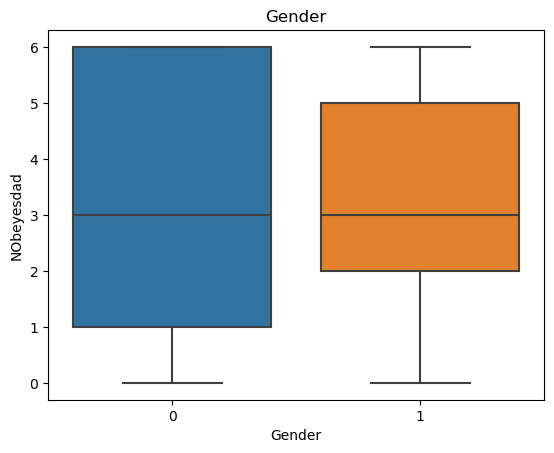

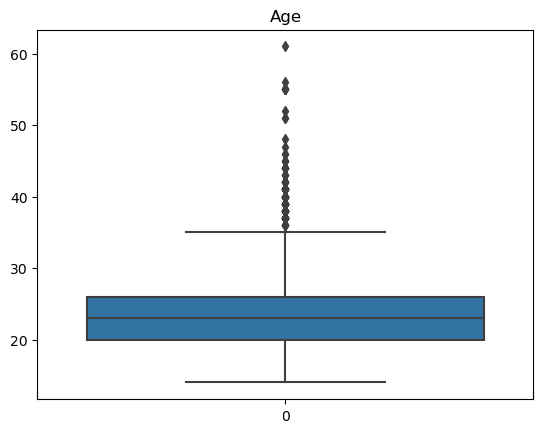

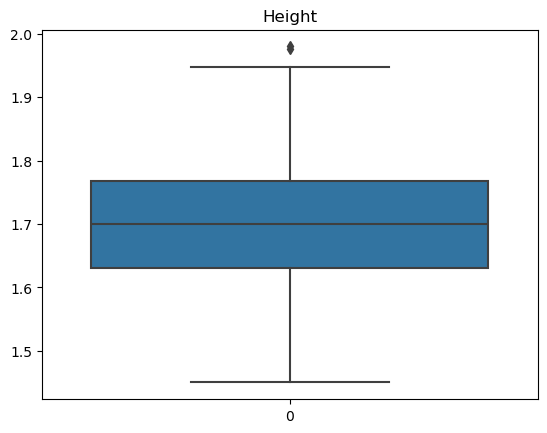

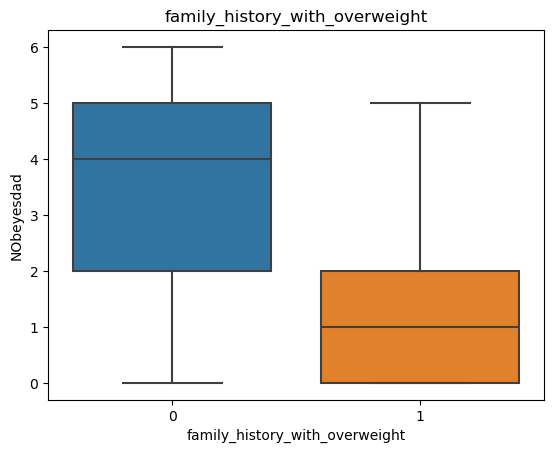

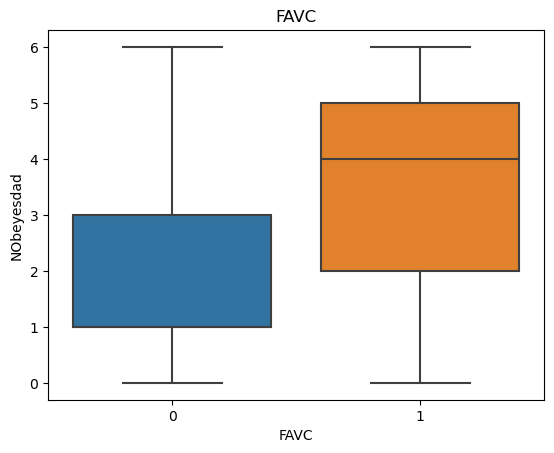

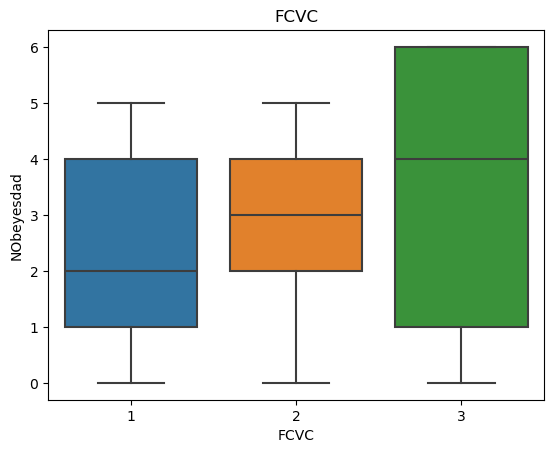

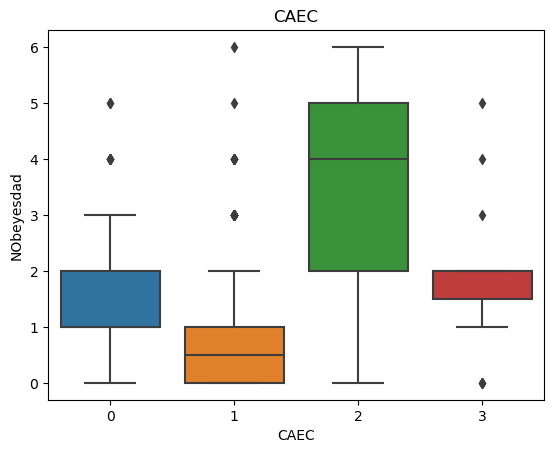

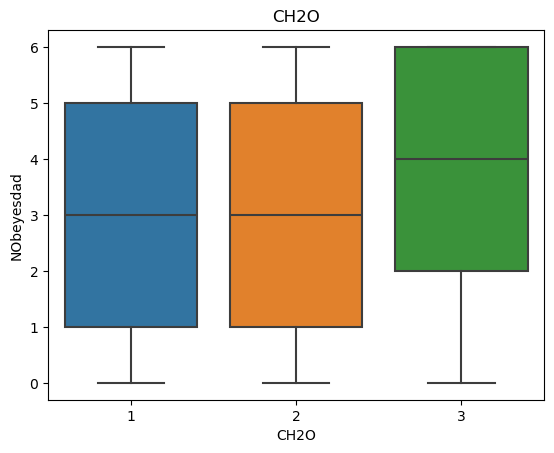

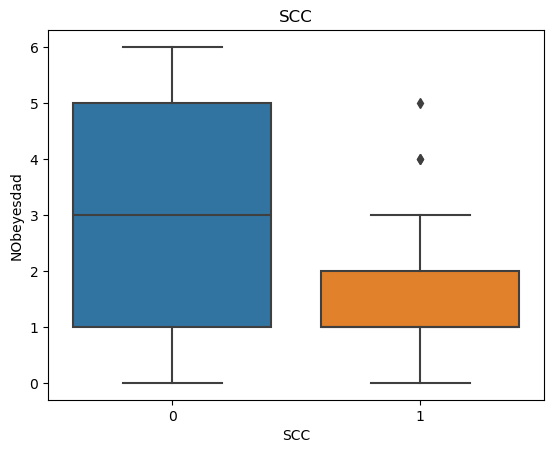

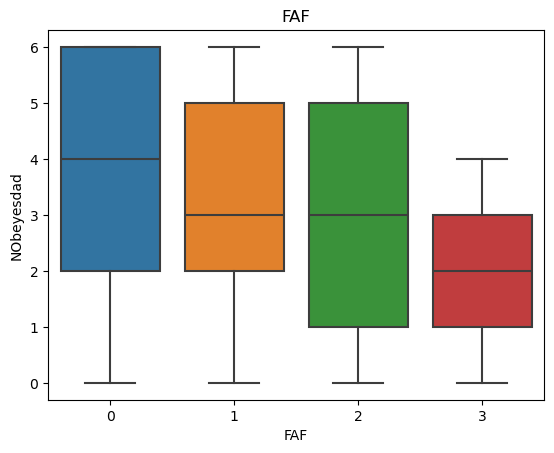

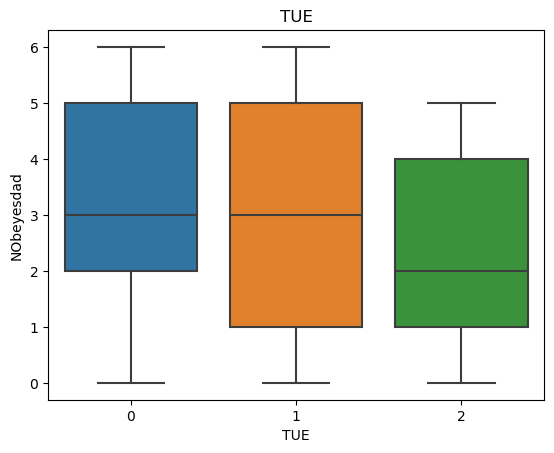

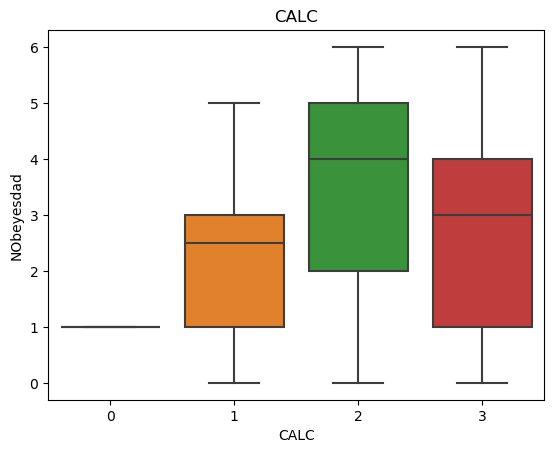

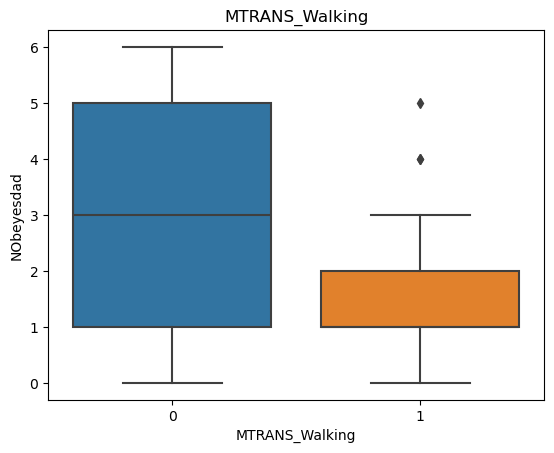

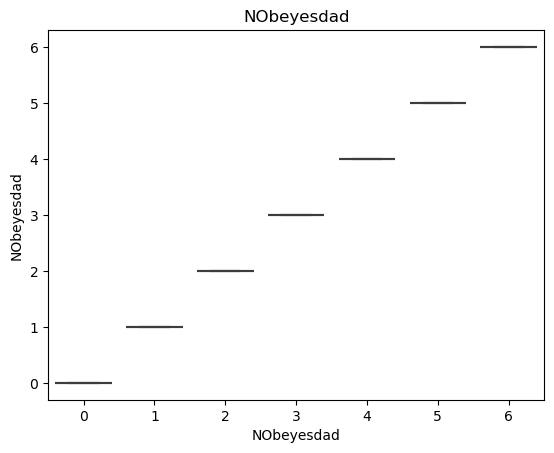

In [88]:
for col_name in df.columns:
    if df[col_name].dtype == "object" or len(df[col_name].unique())<10:
        sns.boxplot(x = col_name, y="NObeyesdad", data=df)
        plt.title(col_name)
        plt.show()
    else:
        sns.boxplot(df[col_name])
        plt.title(col_name)
        plt.show()

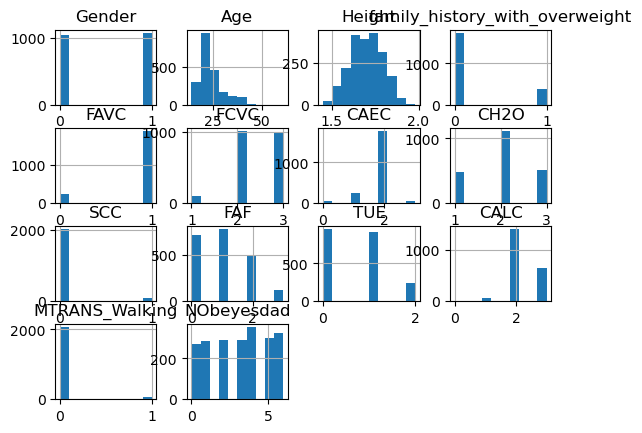

In [89]:
df.hist()
plt.show()

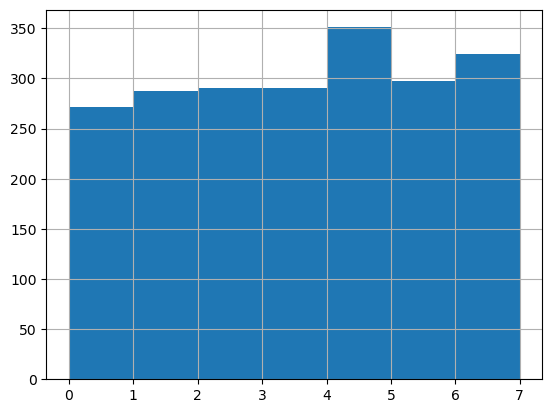

In [90]:
x = df["NObeyesdad"]
plt.hist(x, bins=range(8))
plt.grid()

## 2-2. 중복 데이터  확인하기 / 클래스 균형 확인

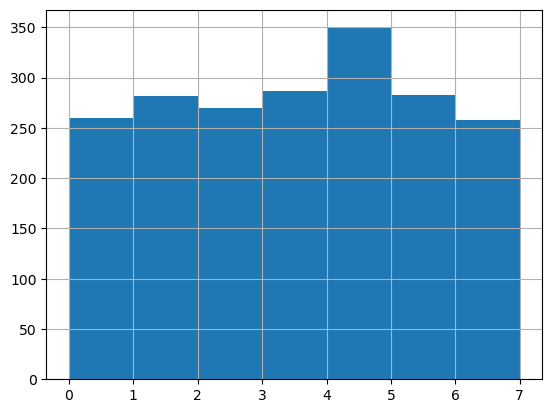

In [91]:
temp = df.drop_duplicates()
x = temp["NObeyesdad"]
plt.hist(x, bins=range(8))
plt.grid() # 삭제해도 target의 균등한 분포가 유지되니 삭제해도 될 듯

In [92]:
df = df.drop_duplicates()
df.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS_Walking,NObeyesdad
0,0,21,1.62,0,0,2,2,2,0,0,1,3,0,1
1,0,21,1.52,0,0,3,2,3,1,3,0,2,0,1
2,1,23,1.80,0,0,2,2,2,0,2,1,1,0,1
3,1,27,1.80,1,0,3,2,2,0,2,0,1,1,2
4,1,22,1.78,1,0,2,2,2,0,0,0,2,0,3


## 2-3 Scaling

In [93]:
# 스케일링 fit 전에 데이터 분리하기, 일단 K-fold 없이 
featureDF = df.iloc[:,:-1]
targetSR = df.iloc[:,-1]

from sklearn.model_selection import train_test_split # 분리
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2,
                                                                        stratify=targetSR,
                                                                         random_state = 42)

In [94]:
def plot_hist(DF, col_list):
    for col in col_list:
        DF[col].hist()
        plt.title(col)
        plt.show()

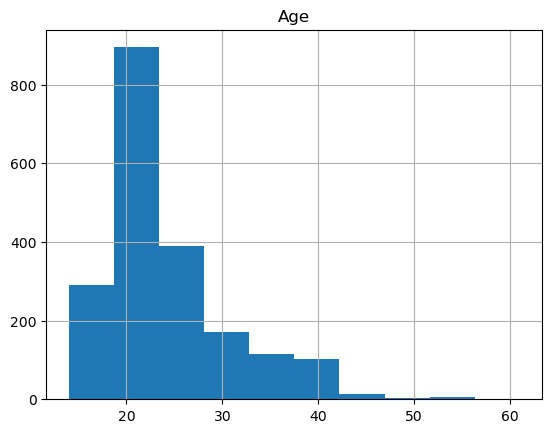

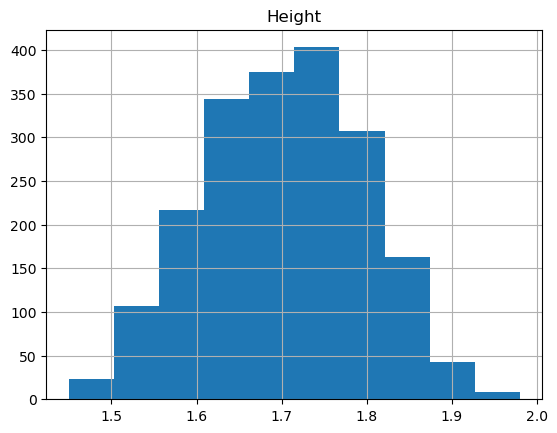

In [95]:
# 표준화전 
col_list = ["Age", "Height"]
plot_hist(featureDF, col_list)

In [96]:
from sklearn.preprocessing import StandardScaler # 평균 0 편차 1 표준화
Age_Stand = StandardScaler()
Height_Stand = StandardScaler()

Stand_X_train = X_train.copy()
Stand_X_test = X_test.copy()

Stand_X_train["Age"] = Age_Stand.fit_transform(X_train[["Age"]])
Stand_X_train["Height"] = Height_Stand.fit_transform(X_train[["Height"]])

Stand_X_test["Age"] = Age_Stand.transform(X_test[["Age"]])
Stand_X_test["Height"] = Height_Stand.transform(X_test[["Height"]])

In [117]:
Age_Stand.transform([[22]])

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.37025452]])

In [118]:
Height_Stand.transform([[1.59]])

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.18250493]])

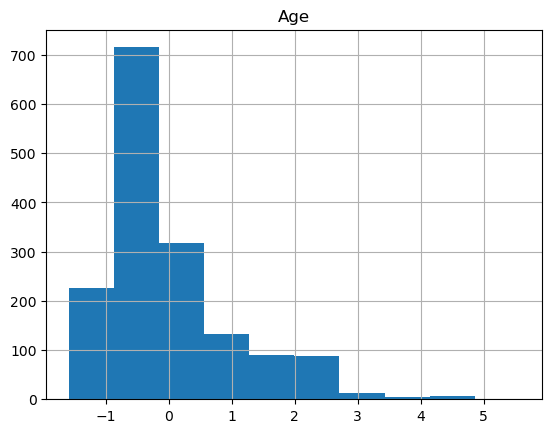

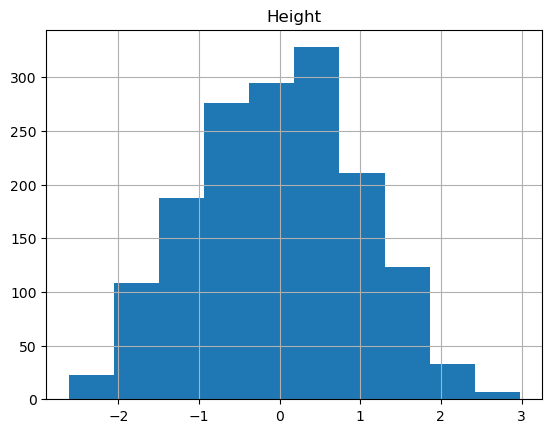

In [97]:
# 표준화 후
col_list = ["Age", "Height"]
plot_hist(Stand_X_train, col_list)

# 3. 분류 모델

In [98]:
# 단독 모델
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC # Support Vector Classification
from sklearn.tree import DecisionTreeClassifier # DecisionTree
from sklearn.ensemble import RandomForestClassifier # 왕많은 DecisionTree

In [99]:
def print_score(model, X_train, X_test, y_train, y_test):
    print(f"train score : {model.score(X_train, y_train)}, test score : {model.score(X_test, y_test)}")
    print("precision_score")
    test_pred = model.predict(X_test)
    pre_score = precision_score(y_test, test_pred, average="micro")
    print(pre_score)

In [100]:
Logistic_model = LogisticRegression(max_iter=1000, random_state=42)
SVC_model = SVC(random_state=42)
Tree_model = DecisionTreeClassifier(max_depth=6, random_state=42)
Random_Forest_model = RandomForestClassifier(max_depth=6, random_state=42)

model_list = [Logistic_model, SVC_model, Tree_model, Random_Forest_model]

for model in model_list:
    model.fit(Stand_X_train, y_train)
    print(model.score(Stand_X_train, y_train))
    print(model.score(Stand_X_test, y_test))
    print()

0.5646984924623115
0.5402010050251256

0.6940954773869347
0.6733668341708543

0.6532663316582915
0.5904522613065326

0.7826633165829145
0.7286432160804021


In [101]:
# 랜덤 포레스트만 가지고 해보자!! 

## (SGD)확률적 경사 하강법 써보기 -> 로지스틱과 비교

In [102]:
from sklearn.linear_model import SGDClassifier # 확률적 경사하강법

SGD_model = SGDClassifier(loss="log_loss", random_state=42, n_iter_no_change=10)
# 한 번에 한 개 데이터만 랜덤 샘플링 통해 추출 후 Gradient 계산

'''
과대적합일 때, 강도 조절을 위함 
alpha가 높으면 가중치를 강하게 제한하여 단순한 결정 경계를 학습 -> 패턴에 민감하지 않게  반응
alpha 작아지면 규제가 약하게 들어가는 것 
alpha : float, default=0.0001
    Constant that multiplies the regularization term. 
'''

# -> 파라미터 조정이 넘 귀찮고 힘들다 -> grid
SGD_model.fit(Stand_X_train, y_train)

SGDClassifier(loss='log_loss', n_iter_no_change=10, random_state=42)

In [103]:
print_score(SGD_model, Stand_X_train, Stand_X_test, y_train, y_test)

train score : 0.5182160804020101, test score : 0.5150753768844221
precision_score
0.5150753768844221


---

In [104]:
from sklearn.model_selection import cross_val_score, cross_validate
# cross_validate은 기본적으로 stratified K-fl
test_model = DecisionTreeClassifier()

cross_validate(test_model, featureDF, targetSR, scoring="accuracy", cv=5)["test_score"]

array([0.53266332, 0.72110553, 0.74120603, 0.75628141, 0.79145729])

---

## 랜덤 포레스트만 해보기
n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,

In [105]:
from sklearn.model_selection import GridSearchCV

n_CV = 5

Random_Forest_model = RandomForestClassifier(max_depth=6)

params = { "n_estimators" : [100, 150],
          "criterion" : ["gini", "entropy", "log_loss"],
          "max_depth" : [4, 5, 6],
}

GS = GridSearchCV(Random_Forest_model, param_grid=params, cv = n_CV)

result = GS.fit(Stand_X_train, y_train)

In [106]:
cv_resultDF = pd.DataFrame(GS.cv_results_)
cv_resultDF.sort_values("rank_test_score", ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.209888,0.010643,0.012054,0.006212,log_loss,6,150,"{'criterion': 'log_loss', 'max_depth': 6, 'n_e...",0.686520,0.711599,0.726415,0.694969,0.713836,0.706668,0.014202,1
16,0.140899,0.007027,0.008185,0.007153,log_loss,6,100,"{'criterion': 'log_loss', 'max_depth': 6, 'n_e...",0.670846,0.724138,0.701258,0.698113,0.682390,0.695349,0.018109,2
10,0.145589,0.009570,0.006415,0.007593,entropy,6,100,"{'criterion': 'entropy', 'max_depth': 6, 'n_es...",0.661442,0.730408,0.704403,0.682390,0.682390,0.692206,0.023440,3
11,0.237693,0.030305,0.017028,0.003131,entropy,6,150,"{'criterion': 'entropy', 'max_depth': 6, 'n_es...",0.670846,0.702194,0.698113,0.685535,0.685535,0.688445,0.011038,4
5,0.187991,0.010437,0.016661,0.007289,gini,6,150,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.655172,0.699060,0.698113,0.694969,0.666667,0.682796,0.018278,5
4,0.122919,0.003315,0.010452,0.005727,gini,6,100,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.648903,0.695925,0.713836,0.688679,0.654088,0.680286,0.024947,6
9,0.187606,0.008366,0.016231,0.008584,entropy,5,150,"{'criterion': 'entropy', 'max_depth': 5, 'n_es...",0.633229,0.661442,0.644654,0.654088,0.635220,0.645727,0.010813,7
2,0.114680,0.007489,0.009630,0.007866,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.642633,0.667712,0.628931,0.635220,0.644654,0.643830,0.013180,8
15,0.192229,0.003074,0.008785,0.007260,log_loss,5,150,"{'criterion': 'log_loss', 'max_depth': 5, 'n_e...",0.630094,0.658307,0.632075,0.650943,0.635220,0.641328,0.011224,9
3,0.167659,0.011312,0.015339,0.000445,gini,5,150,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.623824,0.664577,0.641509,0.647799,0.619497,0.639441,0.016417,10


In [107]:
best_model = GS.best_estimator_

In [108]:
best_model.score(Stand_X_train, y_train)

0.7814070351758794

In [109]:
best_model.score(Stand_X_test, y_test)

0.7286432160804021

---

In [110]:
from sklearn.ensemble import BaggingClassifier # 배깅 분류기 병렬 같은 알고리즘을 여러번 사용

ensemble_bagging_model = BaggingClassifier(estimator=best_model, n_estimators=100, random_state=42)
ensemble_bagging_model.fit(Stand_X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(criterion='log_loss',
                                                   max_depth=6,
                                                   n_estimators=150),
                  n_estimators=100, random_state=42)

In [111]:
print_score(ensemble_bagging_model, Stand_X_train, Stand_X_test, y_train, y_test)

train score : 0.7776381909547738, test score : 0.7336683417085427
precision_score
0.7336683417085427


----

부스팅 방식(직렬) : 앞의 학습 결과를 가지고 순차적으로 학습하며 오차를 줄여 나감
- AdaBoost : 이전 예측기를 보완하는 새로운 예측기, 가중치 업데이트 -> pick
- Gradient Boost : 이전 모델 결과의 잔여 오차 사용
- XGboost : Gradient에서 정확도와 속도를 개선한 모델 -> pick

In [112]:
from sklearn.ensemble import AdaBoostClassifier # 부스팅은 랜덤포레스트 기반

In [113]:
Ada_model = AdaBoostClassifier(
    best_model, random_state=42)
Ada_model.fit(Stand_X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='log_loss',
                                                    max_depth=6,
                                                    n_estimators=150),
                   random_state=42)

In [114]:
print_score(Ada_model, Stand_X_train, Stand_X_test, y_train, y_test)

train score : 0.9585427135678392, test score : 0.8090452261306532
precision_score
0.8090452261306532


In [115]:
n_CV = 5

'''
 n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
    base_estimator='deprecated',
'''
params = { "n_estimators" : [50],
          "algorithm" : ['SAMME', 'SAMME.R'],
          "learning_rate" : [0.5, 1.0],
}

GS2 = GridSearchCV(Ada_model, param_grid=params, cv = n_CV)

result2 = GS2.fit(Stand_X_train, y_train)

KeyboardInterrupt: 

In [ ]:
cv_resultDF2 = pd.DataFrame(GS2.cv_results_)
cv_resultDF2.sort_values("rank_test_score", ascending=True).head(10)

In [ ]:
best_model2 = GS2.best_estimator_

In [ ]:
print_score(best_model2, Stand_X_train, Stand_X_test, y_train, y_test)

---

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # 부스팅은 랜덤포레스트 기반

In [ ]:
GBoost_model = GradientBoostingClassifier(random_state=42)
GBoost_model.fit(Stand_X_train, y_train)

In [ ]:
print_score(GBoost_model, Stand_X_train, Stand_X_test, y_train, y_test)

---

In [ ]:
from xgboost import XGBClassifier # XGboost

In [ ]:
# 객체 생성
xgb_model = XGBClassifier(n_estimators=100, tree_method="hist", max_depth=5)
xgb_model.fit(Stand_X_train, y_train)

In [ ]:
print_score(xgb_model, Stand_X_train, Stand_X_test, y_train, y_test)

In [ ]:

# 예측하기
# y_pre = xgb_model.predict(X_test)
# y_pred_probs = xgb_model.predict_proba(X_test)[:,1]

# 특성 중요도 시각화
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax) 


# 4. 평가

In [ ]:
print_score(xgb_model, Stand_X_train, Stand_X_test, y_train, y_test)

In [ ]:
import joblib
import os

# 모델 저장 
model_dir = "../model/"
model_filename = model_dir+"obesity.pkl"

# 저장 폴더 존재여부 확인 후 저장 
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

joblib.dump(xgb_model, model_filename)

In [ ]:
Stand_X_train.columns